# Data Augmentation for Human Detection Dataset

## Objective
This notebook focuses on applying data augmentation techniques to the human detection dataset to improve the diversity and robustness of the training data. Data augmentation helps prevent overfitting by artificially increasing the size of the dataset through transformations such as rotation, flipping, zooming, and more.

In [5]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Define Augmentation Parameters

In [6]:
# Define an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=30,  # Random rotation degrees
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shear intensity
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill mode for missing pixels
)

## Visualize Augmented Images

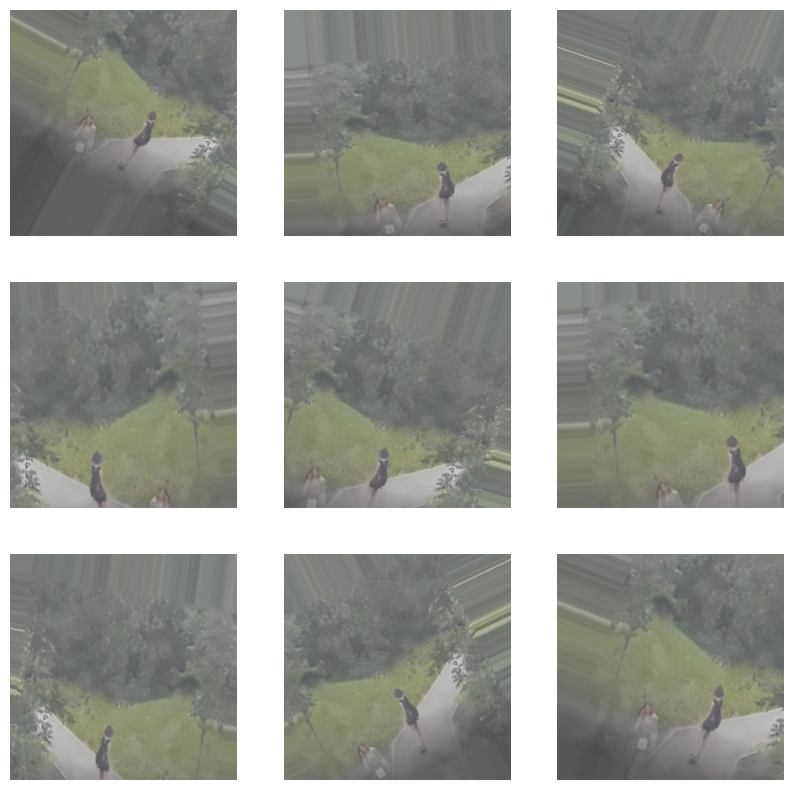

In [7]:
# Load a sample image from the training dataset
def visualize_augmentations(image):
    # Normalize the image to [0, 1]
    if image.max() > 1.0:
        image = image / 255.0

    # Add batch dimension
    image = image[np.newaxis, ...]
    aug_iter = datagen.flow(image)

    # Plot augmented images
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        aug_image = next(aug_iter)[0]  # Get the next augmented image
        plt.imshow(aug_image)
        plt.axis('off')
    plt.show()

# Replace with the path to one of your training images
sample_image_path = os.path.join('human_detection_dataset', '1', os.listdir('human_detection_dataset/1')[0])
sample_image = plt.imread(sample_image_path)  # Read the sample image
visualize_augmentations(sample_image)


## Augment Training Dataset

In [9]:
# Augment the training dataset
def augment_dataset(X_train, y_train, batch_size=32):
    """
    Apply data augmentation to the training dataset.
    
    Parameters:
        X_train (numpy array): Training images.
        y_train (numpy array): Training labels.
        batch_size (int): Batch size for augmentation.
        
    Returns:
        Augmented data generator.
    """
    datagen.fit(X_train)
    return datagen.flow(X_train, y_train, batch_size=batch_size)

# Example usage (assuming X_train and y_train are already loaded):
# augmented_data = augment_dataset(X_train, y_train)